In [57]:
import requests
import json
import pandas as pd
# from config import nyt_key
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

Get an API key from NYT here: 
https://developer.nytimes.com/

In [ ]:
base_url = f"https://api.nytimes.com/svc/archive/v1/2020/3.json?api-key={nyt_key}"
pprint(requests.get(base_url).json(),indent=1)

In [ ]:
response=requests.get(base_url)
response.url

In [168]:
response=requests.get(base_url)
data=response.json()
docs=data['response']['docs']
docs[0].keys()
keys=['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source', 'multimedia', 
'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 
'subsection_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri']
doc_list=[]
for each_doc in docs[0: 500]: 
    current_doc=each_doc
    doc_dict={}
    for each_key in keys: 
        try: 
            doc_dict[each_key]=current_doc[each_key]
        except: 
            pass
    doc_list.append(doc_dict)

df=pd.DataFrame(doc_list)

In [118]:
pprint(response.json()['response']['docs'][0])

{'_id': 'nyt://article/7facf445-c27e-5458-9863-78e2d77c512d',
 'abstract': 'Mulaney, the comic and former “S.N.L.” writer, and the cast took '
             'aim at Mike Pence, the Democratic presidential race and La '
             'Guardia Airport, among other targets.',
 'byline': {'organization': None,
            'original': 'By Dave Itzkoff',
            'person': [{'firstname': 'Dave',
                        'lastname': 'Itzkoff',
                        'middlename': None,
                        'organization': '',
                        'qualifier': None,
                        'rank': 1,
                        'role': 'reported',
                        'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': None,
              'kicker': None,
              'main': 'On ‘S.N.L.’, John Mulaney and Jake Gyllenhaal Find '
                      'Humor in the Coronavirus',
              'name': None,
              'print_headline': None,
              'seo

In [172]:
# pd.set_option('display.height', 1000)
# pd.set_option('display.width', 2)
df['lead_paragraph_count']=df['lead_paragraph'].str.split(' ').map(len)
df[['lead_paragraph', 'news_desk', 'lead_paragraph_count']].head()

,lead_paragraph,news_desk,lead_paragraph_count
0,"The annual appearances of John Mulaney, who th...",Culture,105
1,MONDAY PUZZLE — March is Women’s History Month...,Games,36
2,Finally! Four states and nearly two months int...,Editorial,71
3,(Want to get this briefing by email? Here’s th...,NYTNow,10
4,"GLENDALE, Ariz. — Alex Wood was the last pitch...",Sports,71


View the different news desks

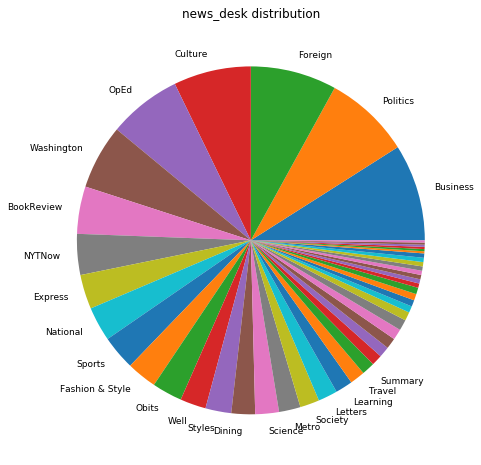

In [195]:
labels=[]
for index, count in df['news_desk'].value_counts().iteritems(): 
    if count>5: 
        labels.append(index)
    else: 
        labels.append('')
df['news_desk'].value_counts().plot(labels=labels, kind='pie', fontsize=9, figsize=(8, 8), title='news_desk distribution')
plt.ylabel('')
plt.show()

Use the Count Vectorizer utility from sklearn to count the frequency of the terms

In [196]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# assign the 'lead_paragraph' series to a variable
paragraph=df['lead_paragraph']
# initiate an instance of the CountVectorizer object
count_vec=CountVectorizer(stop_words='english')
encoded=count_vec.fit_transform(paragraph)
encoded

<500x3873 sparse matrix of type '<class 'numpy.int64'>'
	with 9543 stored elements in Compressed Sparse Row format>

In [197]:
count_vec.vocabulary_

{'annual': 216,
 'appearances': 234,
 'john': 1859,
 'mulaney': 2267,
 'weekend': 3773,
 'hosted': 1677,
 'saturday': 2988,
 'night': 2331,
 'live': 2039,
 'time': 3508,
 'seasons': 3024,
 'enjoyable': 1198,
 'traditions': 3545,
 'current': 904,
 'era': 1219,
 'history': 1648,
 'presence': 2634,
 'writer': 3841,
 'turned': 3587,
 'stand': 3241,
 'star': 3244,
 'ubiquitous': 3598,
 'comic': 741,
 'talisman': 3419,
 'oh': 2380,
 'hello': 1622,
 'documentary': 1079,
 'spider': 3215,
 'man': 2096,
 'verse': 3674,
 'help': 1623,
 'loosen': 2060,
 'cast': 582,
 'members': 2168,
 'bring': 495,
 'goofiest': 1506,
 'material': 2138,
 'extra': 1275,
 'stars': 3247,
 'latest': 1952,
 'netflix': 2318,
 'special': 3203,
 'sack': 2970,
 'lunch': 2077,
 'bunch': 520,
 'including': 1735,
 'jake': 1837,
 'gyllenhaal': 1563,
 'week': 3771,
 'musical': 2280,
 'guest': 1557,
 'david': 930,
 'byrne': 532,
 'monday': 2240,
 'puzzle': 2723,
 'march': 2109,
 'women': 3814,
 'month': 2243,
 'new': 2323,
 'york

In [199]:
len(count_vec.get_feature_names())

3873

In [203]:
len(encoded.toarray()[0])

3873

In [204]:
count_vec.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '12',
 '128',
 '13',
 '14',
 '15',
 '1739',
 '1740',
 '18',
 '1865',
 '18th',
 '19',
 '1913',
 '1923',
 '1933',
 '1962',
 '1965',
 '1969',
 '1970s',
 '1979',
 '1980s',
 '1990',
 '1994',
 '19th',
 '20',
 '200',
 '2000',
 '2006',
 '2008',
 '2010s',
 '2012',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2030',
 '2050',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '270',
 '28',
 '29',
 '30',
 '300',
 '31',
 '32',
 '324',
 '40',
 '43',
 '44',
 '46',
 '48',
 '500',
 '50s',
 '53',
 '54',
 '550',
 '59th',
 '66',
 '67',
 '70',
 '70s',
 '72',
 '76',
 '80',
 '800',
 '80s',
 '84',
 '8th',
 '90',
 '92',
 '93',
 '95',
 '96',
 '_________',
 'aaron',
 'abandoned',
 'abdul',
 'ability',
 'able',
 'abortion',
 'abramovic',
 'absent',
 'absolutely',
 'abstract',
 'absurd',
 'academy',
 'accept',
 'access',
 'according',
 'account',
 'accused',
 'achieve',
 'achievement',
 'act',
 'action',
 'activism',
 'activist',
 'activi

In [200]:
encoded.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [268]:
term_count=zip(encoded.toarray().sum(axis=0), count_vec.get_feature_names())
sorted_term_count=sorted(list(term_count), reverse=True)
sorted_term_count

[(83, 'new'),
 (79, 'coronavirus'),
 (48, 'monday'),
 (45, 'states'),
 (40, 'sign'),
 (38, 'tuesday'),
 (38, 'said'),
 (36, 'president'),
 (32, 'washington'),
 (32, 'trump'),
 (30, 'year'),
 (30, 'time'),
 (30, 'democratic'),
 (29, 'week'),
 (28, 'united'),
 (27, 'want'),
 (27, 'outbreak'),
 (26, 'york'),
 (26, 'died'),
 (23, 'people'),
 (22, '2020'),
 (21, 'sunday'),
 (21, 'month'),
 (21, 'economic'),
 (20, 'years'),
 (20, 'south'),
 (20, 'presidential'),
 (20, 'home'),
 (20, 'election'),
 (20, 'country'),
 (19, 'world'),
 (19, 'women'),
 (19, 'times'),
 (19, 'march'),
 (19, 'group'),
 (18, 'race'),
 (18, 'public'),
 (18, 'make'),
 (18, 'government'),
 (18, 'email'),
 (18, 'biden'),
 (17, 'spread'),
 (17, 'briefing'),
 (16, 'work'),
 (16, 'state'),
 (16, 'small'),
 (16, 'old'),
 (16, 'like'),
 (16, 'just'),
 (16, 'city'),
 (16, 'carolina'),
 (15, 'senator'),
 (15, 'sanders'),
 (15, 'officials'),
 (15, 'months'),
 (15, 'los'),
 (15, 'day'),
 (15, 'court'),
 (15, 'company'),
 (15, 'chin

In [269]:
top_terms_counts=[each_term[0] for each_term in sorted_term_count[:10]]
top_terms=[each_term[1] for each_term in sorted_term_count[:10]]

In [270]:
term_df=pd.DataFrame(encoded.toarray(), columns=count_vec.get_feature_names())
term_df['news_desk']=df['news_desk']
term_df.head()

,000,10,100,11,12,128,13,14,15,1739,...,youtube,yvonne,zampa,zero,zhang,zhi,zone,zuleima,zuoling,news_desk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Culture
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Games
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Editorial
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NYTNow
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sports


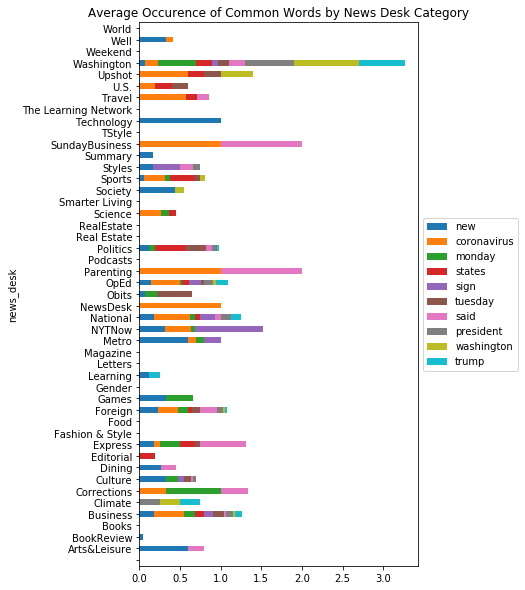

In [271]:
# term_df[top_terms+['news_desk']].groupby('news_desk').mean().unstack().plot(kind='bar', stacked=True, legend=['news_desk'])
term_df[top_terms+['news_desk']].groupby('news_desk').mean().plot(kind='barh', stacked=True, figsize=(5, 10), title='Average Occurence of Common Words by News Desk Category')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

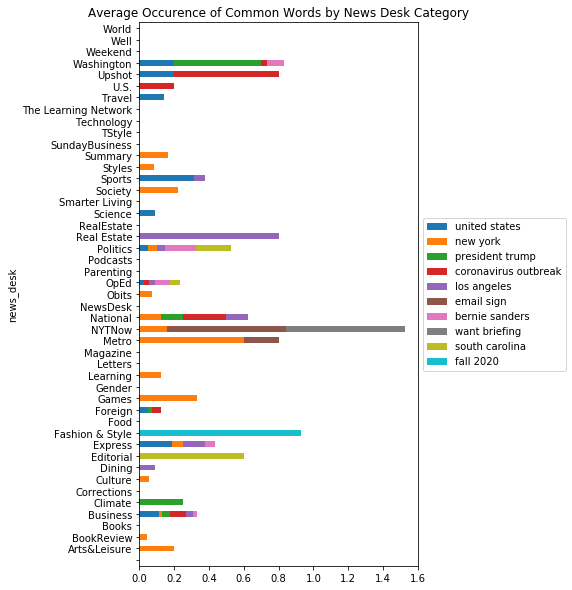

In [286]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# assign the 'lead_paragraph' series to a variable
paragraph=df['lead_paragraph']
# initiate an instance of the CountVectorizer object
count_vec=CountVectorizer(stop_words='english', ngram_range=(2, 2))
encoded=count_vec.fit_transform(paragraph)

term_count=zip(encoded.toarray().sum(axis=0), count_vec.get_feature_names())
sorted_term_count=sorted(list(term_count), reverse=True)

top_terms_counts=[each_term[0] for each_term in sorted_term_count[:10]]
top_terms=[each_term[1] for each_term in sorted_term_count[:10]]

term_df=pd.DataFrame(encoded.toarray(), columns=count_vec.get_feature_names())
term_df['news_desk']=df['news_desk']

term_df[top_terms+['news_desk']].groupby('news_desk').mean().plot(kind='barh', stacked=True, figsize=(5, 10), title='Average Occurence of Common Words by News Desk Category')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [295]:
term_count=zip(encoded.toarray().sum(axis=0), count_vec.get_feature_names())
sorted_term_count=sorted(list(term_count), reverse=True)
sorted_term_count

[(27, 'united states'),
 (26, 'new york'),
 (21, 'president trump'),
 (16, 'coronavirus outbreak'),
 (15, 'los angeles'),
 (15, 'email sign'),
 (15, 'bernie sanders'),
 (13, 'want briefing'),
 (13, 'south carolina'),
 (13, 'fall 2020'),
 (13, 'briefing email'),
 (13, '2020 collection'),
 (11, 'year old'),
 (10, 'joseph biden'),
 (10, 'biden jr'),
 (9, 'york city'),
 (8, 'york times'),
 (8, 'supreme court'),
 (8, 'joe biden'),
 (7, 'super tuesday'),
 (7, 'married feb'),
 (7, 'latest coronavirus'),
 (7, 'economic damage'),
 (7, 'democratic presidential'),
 (6, 'years ago'),
 (6, 'washington president'),
 (6, 'senator bernie'),
 (6, 'san francisco'),
 (6, 'pete buttigieg'),
 (6, 'michael bloomberg'),
 (6, 'institute advanced'),
 (6, 'general election'),
 (6, 'died tuesday'),
 (6, 'died sunday'),
 (6, 'democratic primary'),
 (5, 'white house'),
 (5, 'want inbox'),
 (5, 'trump administration'),
 (5, 'said monday'),
 (5, 'public health'),
 (5, 'prime minister'),
 (5, 'pharmaceutical companie